In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터 로드

In [ ]:
# 판다스로 각 파일데이터를  train/test 변수에 바인딩
cosmetic_data = pd.read_table('cosmetic_review_data.txt')
app_data = pd.read_table('mobile_app_review_data.txt')

In [ ]:
# 데이터 체크
print('화장품 리뷰 데이터 개수 :',len(cosmetic_data))
print('모바일앱 리뷰 데이터 개수 :',len(app_data))

화장품 리뷰 데이터 개수 : 10000
모바일앱 리뷰 데이터 개수 : 927


In [ ]:
# 상위 5개 출력
cosmetic_data[:5]

,document,label
0,검은 피부엔 맞지 않네요... 뽀오얀 피부엔 괜찮아요... 색상 쪼금 어두워요,0
1,봄 신상 색상 너무 저렴하게 나와서 모두 구매했는데 다 이쁨,1
2,싸게 샀는데 ...색은 그렇다 치고 잘 번져요 엄청 건조하고 싼맛 그냥 색 느낌만 ...,0
3,배송 3일이나 걸렸지만 저렴하게 구매해서 기분이 좋네요,0
4,페리페라 입소문 듣고 사용해본 적은 없는데 가격 저렴하게 샀어요 처음 사용해보는 ...,1


In [ ]:
# 상위 5개 출력
app_data[:5]

,ratings,document,label
0,1,아니 제일은행 들어갈라면 이거깔아야된다해서 깔앗는데 알약쓰는뎁쇼,0
1,4,음악 어플리케이션 중 가장 좋다 측면에서도 뛰어나고 이용자가 많아 음악 차트의 정확...,1
2,4,다양한 자료의 공유 및 폴더 별 정리 등 업무나 연구에 있어서 파일 정리가 필요한 ...,1
3,5,실시간 통장 잔고 확인 계좌이체 등 여러가지 은행 업무를 수행할 수 있어서 좋다 불...,1
4,5,대한민국 안에서는 구글 지도보다도 훨씬 편리하다 도착지 계산 및 교통수단 자동검색 ...,1


In [ ]:
# 데이터 프레임 합치기
total_data = pd.concat([cosmetic_data, app_data])
print(len(total_data))

10927


In [ ]:
total_data[:]

,document,label,ratings
0,검은 피부엔 맞지 않네요... 뽀오얀 피부엔 괜찮아요... 색상 쪼금 어두워요,0,NaN
1,봄 신상 색상 너무 저렴하게 나와서 모두 구매했는데 다 이쁨,1,NaN
2,싸게 샀는데 ...색은 그렇다 치고 잘 번져요 엄청 건조하고 싼맛 그냥 색 느낌만 ...,0,NaN
3,배송 3일이나 걸렸지만 저렴하게 구매해서 기분이 좋네요,0,NaN
4,페리페라 입소문 듣고 사용해본 적은 없는데 가격 저렴하게 샀어요 처음 사용해보는 ...,1,NaN
...,...,...,...
922,바로 바로 네이버 메인페이지에 들어갈수있어서 좋지만 가끔 오류가 나서 좀 별로입니다...,0,2.0
923,카카오톡 보다 모르는 사람들과 얘기할 때 더 편하게 할 수 있고 메세지 속도도 빠르...,1,4.0
924,가입이 간단하고 오피스 모바일등 접근성이 좋은 것이 마음에 든다 다만 너무 간결한 ...,1,4.0
925,필터 적용시 사진을 예쁘게 찍을 수 있어서 자주 사용하게 된다 하지만 이 어플로 사...,1,4.0


In [ ]:
total_data.drop(['ratings'], axis='columns', inplace=True)
total_data[:5]

,document,label
0,검은 피부엔 맞지 않네요... 뽀오얀 피부엔 괜찮아요... 색상 쪼금 어두워요,0
1,봄 신상 색상 너무 저렴하게 나와서 모두 구매했는데 다 이쁨,1
2,싸게 샀는데 ...색은 그렇다 치고 잘 번져요 엄청 건조하고 싼맛 그냥 색 느낌만 ...,0
3,배송 3일이나 걸렸지만 저렴하게 구매해서 기분이 좋네요,0
4,페리페라 입소문 듣고 사용해본 적은 없는데 가격 저렴하게 샀어요 처음 사용해보는 ...,1


In [ ]:
 # shuffling
total_data = total_data.sample(frac=1).reset_index(drop=True) 
total_data[:5]

,document,label
0,굿 잉크 오리지널만 써봤는데 너무 건조해서 별루였거든요. 근데 이건 되게 뽀송뽀송 ...,1
1,저렴한 가격 득템 했어요 색상 너무 이뻐요,1
2,매트한데 심하지 않고 발색 지속력 좋고 컵에 묻긴 해요 그래도 색상좋네오 내 스타일...,1
3,저렴한 가격에 만족합니다 지적 색상 전혀 기대 안 하고 샀는데 데일리로 짱 과도한...,1
4,어디 놀러가서 쿠폰을 급하게 사거나 살때 싸게 살수있었고 여러 회사들의 가격과 종류...,1


# 데이터 클렌징

In [ ]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(10627, 2)

In [ ]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 10627


In [ ]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


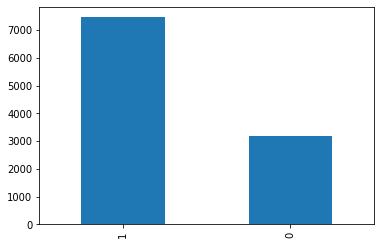

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   3171
1      1   7456


# 정제&정규화한 데이터 파일로 저장

In [ ]:
total_data.to_csv('total_data(app&cosmetic).txt', index=False, sep='\t')